In [109]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

In [116]:
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])
#true_w[0:3]=np.array([ 4.6,  3.2, -2.8])
features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
#练习3取消对x^i除以i的阶乘

for i in range(max_degree):
   poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [117]:
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[ 0.1715],
         [-0.8600]]),
 tensor([[ 1.0000e+00,  1.7148e-01,  1.4703e-02,  8.4046e-04,  3.6031e-05,
           1.2358e-06,  3.5319e-08,  8.6523e-10,  1.8547e-11,  3.5338e-13,
           6.0599e-15,  9.4471e-17,  1.3500e-18,  1.7808e-20,  2.1813e-22,
           2.4937e-24,  2.6727e-26,  2.6960e-28,  2.5685e-30,  2.3182e-32],
         [ 1.0000e+00, -8.5998e-01,  3.6979e-01, -1.0600e-01,  2.2790e-02,
          -3.9198e-03,  5.6183e-04, -6.9024e-05,  7.4199e-06, -7.0900e-07,
           6.0973e-08, -4.7669e-09,  3.4162e-10, -2.2599e-11,  1.3882e-12,
          -7.9589e-14,  4.2778e-15, -2.1640e-16,  1.0339e-17, -4.6797e-19]]),
 tensor([5.0520, 2.0534]))

In [118]:
def evaluate_loss(net, data_iter, loss):  #@save
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [119]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

weight: [[ 2.3482683  12.540396    0.73103255]]


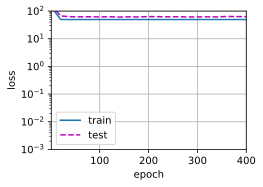

In [73]:
# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
#降低模型复杂度时改为三个维度
train(poly_features[:n_train, :], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

In [57]:
X,y=poly_features[:n_train,:3],labels[:n_train]
X.shape,y.shape

((100, 3), (100,))

In [49]:
w=(X.T@X).inverse()@X.T@y
w

tensor([ 4.6010,  3.2000, -2.7972])

In [75]:
"""如何画出多项式次数和损失函数之间的函数关系图:重新实现train函数"""

'如何画出多项式次数和损失函数之间的函数关系图:重新实现train函数'

In [120]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
#    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
#                           xlim=[1, num_epochs], ylim=[1e-3, 1e2],
#                           legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
#       if epoch == 0 or (epoch + 1) % 20 == 0:
#          animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
#                                    evaluate_loss(net, test_iter, loss)))
#   print('weight:', net[0].weight.data.numpy())
#返回一个train_loss和test_loss
    return evaluate_loss(net,train_iter,loss),evaluate_loss(net,test_iter,loss)

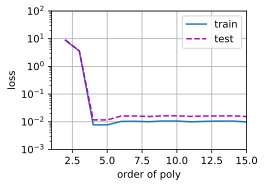

In [121]:
animator = d2l.Animator(xlabel='order of poly', ylabel='loss', yscale='log',
                        xlim=[1, 15], ylim=[1e-3, 1e2],
                        legend=['train', 'test'])
for i in range(2,16):
    train_loss, val_loss = train(poly_features[:n_train, :i], poly_features[n_train:, :i],
      labels[:n_train], labels[n_train:], num_epochs=1500)
    animator.add(i, (train_loss,val_loss))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


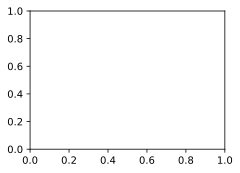

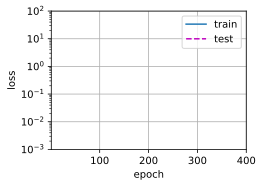

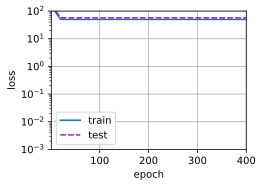

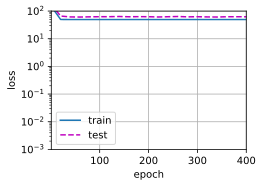

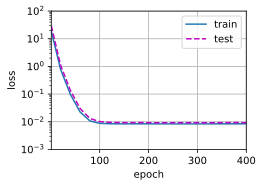

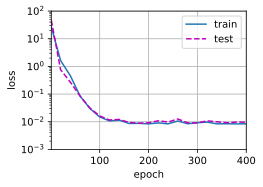

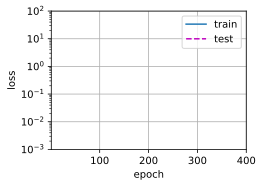

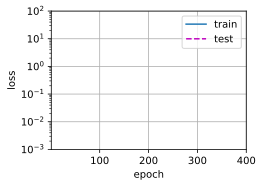

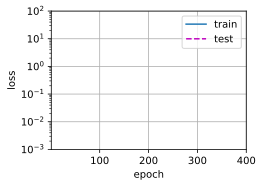

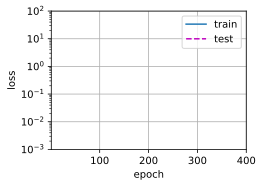

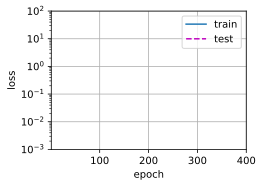

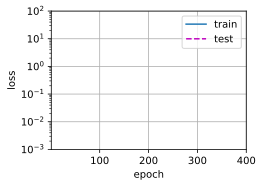

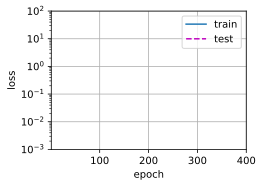

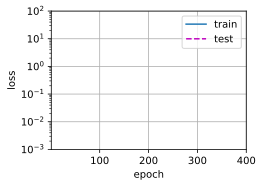

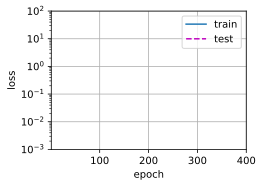